In [95]:
import pandas as pd

class DataProcessor:
    def load_data(self):
        data = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
        return data

    def clean_data(self, data):
        important_columns = ['id', 'dateAdded', 'name', 'brand', 'categories', 'reviews.rating','reviews.numHelpful']
        data = data[important_columns]
        data = data.dropna(axis=0)
        return data

    def analyze_data(self, data):
        # Perform your data analysis here
        pass
    
class DataAnalyzer:
    def get_average_of_column(self, data):
        data['Month'] = pd.to_datetime(data['reviews.date']).dt.to_period('M')
        average_column = data.groupby('Month')['reviews.rating'].mean().reset_index()
        return average_column

    def get_distribution_of_column(self, data, column):
        column_distribution = data[column].value_counts().reset_index()
        column_distribution.columns = [column, 'Count']
        return column_distribution

    def get_median_of_column(self, data):
        median_column = data.groupby('reviews.doRecommend')['reviews.rating'].median().reset_index()
        median_column.columns = ['Recommend', 'Median Rating']
        return median_column

    def get_mode_of_column(self, data):
        mode_column = data.groupby('reviews.rating')['reviews.title'].apply(lambda x: x.mode()).reset_index()
        mode_column.columns = ['Rating', 'Mode Title']
        return mode_column
    
    def calculate_average_rating_by_month(self, data):
        # Convert the "reviews.date" column to datetime
        data['reviews.date'] = pd.to_datetime(data['reviews.date'])
        # Extract the month and year from the "reviews.date" column
        data['Month'] = data['reviews.date'].dt.to_period('M')
        # Calculate the average rating by month
        average_rating = data.groupby('Month')['reviews.rating'].mean().reset_index()
        return average_rating

    def calculate_distribution(self, data, column):
        # Calculate the distribution of values in the specified column
        distribution = data[column].value_counts(normalize=True).reset_index()
        distribution.columns = [column, 'Percentage']
        return distribution

# Create an instance of the DataProcessor class
data_processor = DataProcessor()

# Load the data
data = data_processor.load_data()

if data is not None:
    # Clean the data
    cleaned_data = data_processor.clean_data(data)

    # Display the cleaned data
    print(cleaned_data.head())

    # Analyze the data
    data_processor.analyze_data(cleaned_data)

                     id             dateAdded  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z   

                                                name   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   

                                          categories  reviews.rating  \
0  Computers,Electronics Features,Tablets,Electro...               3   
1  Computers,Electronics Features,Tablets,Electro...               5   
2  Computers,Electronics Features,Tablets,Electro...               4   
3  Computers,Electronics Feature

In [102]:
import pandas as pd
from tabulate import tabulate

class DataProcessor:
    def load_data(self, filepath):
        return pd.read_csv(filepath)
    
    def clean_data(self, data):
        cleaned_data = data.copy()
        # Perform data cleaning operations if needed
        return cleaned_data


# Create an instance of the DataProcessor class
data_processor = DataProcessor()

# Load and clean the data
data = data_processor.load_data('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
cleaned_data = data_processor.clean_data(data)

# Create an instance of the DataAnalyzer class
data_analyzer = DataAnalyzer()

# Calculate average rating by month
average_rating = data_analyzer.get_average_of_column(cleaned_data)
print("Average Rating by Month:")
print(tabulate(average_rating, headers='keys', tablefmt='psql'))
print()

# Calculate rating distribution
rating_distribution = data_analyzer.get_distribution_of_column(cleaned_data, 'reviews.rating')
print("Rating Distribution:")
print(tabulate(rating_distribution, headers='keys', tablefmt='psql'))
print()

# Calculate median rating and recommendation distribution
median_rating = data_analyzer.get_median_of_column(cleaned_data)
print("Median Rating by Recommendation:")
print(tabulate(median_rating, headers='keys', tablefmt='psql'))
print()

# Calculate mode of rating and title distribution
mode_rating = data.groupby('reviews.rating')['reviews.title'].agg(lambda x: x.mode()[0]).reset_index()
mode_rating.columns = ['Rating', 'Mode Title']
mode_rating = mode_rating.dropna()  # Drop rows with NaN values
print("Mode Title by Rating:")
print(tabulate(mode_rating, headers='keys', tablefmt='psql'))


Average Rating by Month:
+----+---------+------------------+
|    | Month   |   reviews.rating |
|----+---------+------------------|
|  0 | 2014-10 |          5       |
|  1 | 2014-11 |          4       |
|  2 | 2014-12 |          5       |
|  3 | 2015-01 |          4.66667 |
|  4 | 2015-02 |          5       |
|  5 | 2015-03 |          5       |
|  6 | 2015-04 |          4.625   |
|  7 | 2015-05 |          5       |
|  8 | 2015-06 |          4       |
|  9 | 2015-07 |          4.66667 |
| 10 | 2015-08 |          4.55556 |
| 11 | 2015-09 |          5       |
| 12 | 2015-11 |          5       |
| 13 | 2015-12 |          5       |
| 14 | 2016-01 |          5       |
| 15 | 2016-02 |          5       |
| 16 | 2016-03 |          3       |
| 17 | 2016-04 |          4.75    |
| 18 | 2016-05 |          4.84615 |
| 19 | 2016-06 |          4.56    |
| 20 | 2016-07 |          4.41176 |
| 21 | 2016-08 |          4.41304 |
| 22 | 2016-09 |          4.6     |
| 23 | 2016-10 |          4.45522 |
| 2

C:\Users\marwa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [109]:
import matplotlib.pyplot as plt
import os
import seaborn as sns

class visualizer:
    def __init__(self, output_dir='output'):
        self.output_dir = output_dir
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

    def save_plot(self, plot, filename):
        # Save the plot as an image file in the specified output directory
        filepath = os.path.join(self.output_dir, filename)
        plot.savefig(filepath)
        print(f"Plot saved as {filepath}")

    def plot_line_chart(self, data, column):
        # Plot a line chart using the specified column of the data
        s=data.head(13)
        plt.plot(s[column])
        plt.xlabel('total')
        plt.ylabel(column)
        plt.title('Line Chart')
        filename = f"{column}_line_chart.png"
        self.save_plot(plt,filename)

    def plot_distribution(self, data, column):
        # Plot a distribution chart using the specified column of the data
        s=data.head(100)
        sns.countplot(x=s['reviews.rating'])
        plt.show()
        filename = f"{column}_plot_distribution.png"
        self.save_plot(plt, filename)

    def plot_pie(self, data, column):
        # Plot a pie chart using the specified column of the data
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.axis('equal')
        plt.title('Pie Chart')
        filename = f"{column}_pie_chart.png"
        self.save_plot(plt, filename)

    def plot_scatter(self, data, column):
        # Plot a scatter plot using the specified column of the data
        s=data.head(500)
        sns.scatterplot(x='reviews.numHelpful',y='reviews.rating',data=s)
        filename = f"{column}_scatter_plot.png"
        self.save_plot(plt, filename)


In [110]:
data_visualizer = visualizer()

Plot saved as output\reviews.rating_line_chart.png


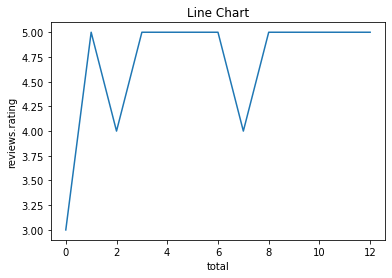

In [111]:
# Plot line chart
data_visualizer.plot_line_chart(data, 'reviews.rating')

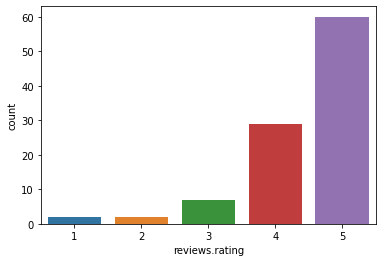

Plot saved as output\reviews.rating_plot_distribution.png


<Figure size 432x288 with 0 Axes>

In [112]:
data_visualizer.plot_distribution(data, 'reviews.rating')

Plot saved as output\reviews.rating_pie_chart.png


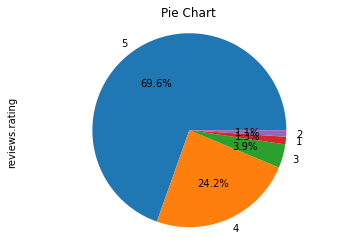

In [113]:
data_visualizer.plot_pie(data, 'reviews.rating')

Plot saved as output\reviews.rating_scatter_plot.png


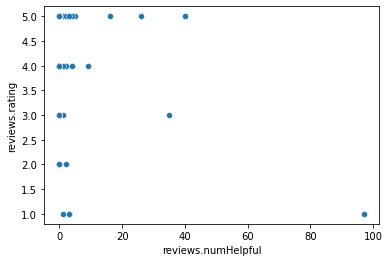

In [114]:
data_visualizer.plot_scatter(data, 'reviews.rating')